# Linear Regression (Least Squares)

## Univariate 

In [69]:
import numpy as np
import pandas as pd

#from subprocess import check_output
#print(check_output(["ls"]).decode("utf8")) # Check the contents of our working directory.

Let's add some labels after importing too. 

In [70]:
data = pd.read_csv('lineData.csv', header=None)
data.columns =(['x','y'])
data.head()

,x,y
0,0.680264,0.699147
1,0.656697,0.776185
2,0.377762,0.569459
3,0.649411,0.386407
4,0.491237,0.927979


In [71]:
import matplotlib.pyplot as plt
# Plot Inline 
%matplotlib inline
plt.style.use('seaborn-whitegrid')

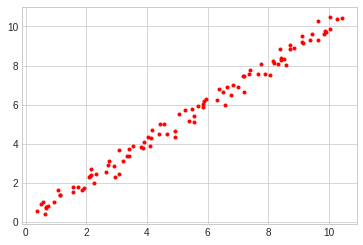

In [72]:
plt.plot(data.x, data.y, 'r.')
plt.show()

This looks promising...

In [73]:
data.corr()

,x,y
x,1.000000,0.994863
y,0.994863,1.000000


Our data can be represented $( y_i, x_i )$, for all $i = 0 ... n$

We can use a linear model to represent our data. A single point would be represented ($\epsilon$ is a random variable representing the error): 
$$ y_i = c + mx_i + \epsilon $$


What we want to do is find constants for $c, m, \epsilon$ that will best predict $y_i$ for $i=0 ...n$ (minimise the error).


Our model, error, squared error:

$$\begin{align*}
    \hat{y} &= c + mx\\\\
    e_i &= y_i - \hat{y_i}\\
    &= y_i - c - mx_i\\\\
    e^2_i &= (y_i - c - mx_i)^2\\
  \end{align*}
$$

We want to minimise our total error (loss), so we define an error function that sums over all of our data and returns the total squared error: 

$$
error(c, m) = \sum_{i=1}^n (y_i - c - mx_i)^2
$$

Then, we minimise this function. We take partial derivatives for $c$ and $m$, set them equal to zero and solve.

$$\begin{align*}
     \frac{\partial error}{\partial c} &= \sum_{i=1}^n 2(y_i - c - mx_i) \boldsymbol{\cdot} (-1)\\
     \frac{\partial error}{\partial m} &= \sum_{i=1}^n 2(y_i - c - mx_i) \boldsymbol{\cdot} -(x_i)
  \end{align*}$$

Setting  equal to zero, and solving we get: 

$$\begin{align*}
     m &= \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}\\\\
     c &= \bar{y} - \hat{m}\bar{x}
  \end{align*}$$
  
So, to minimise our square total squared error, thus determining coefficients for our model chose m and c determined by the above equations.

In [74]:
x_bar = data['x'].mean() # For clarity, store the mean values of x and y
y_bar = data['y'].mean()
print(x_bar, y_bar)

5.3442764931727655 5.4109180519585065


In [75]:
# Calculate m

# Initialise
numer= 0
denom = 0 

for index, row in data.iterrows():
    numer += (row['x']-x_bar)*(row['y']-y_bar)
    denom += (row['x']-x_bar)**2

m = numer / denom


# Calculate c
c = y_bar - m * x_bar
print(m,c)

0.9855991138644605 0.1436038760407623


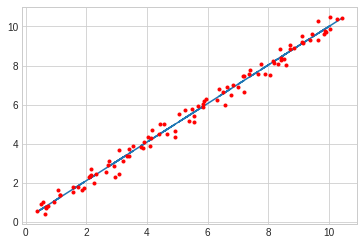

In [76]:
# Plot
plt.plot(data.x, c + m*data.x, '-')
plt.plot(data.x, data.y, 'r.')
plt.show()

But what if we want to fit more than one one variable? What if our data isn't randomly generated to be perfectly linear? It turns out any degree polynomial is linear with respect to it's coefficients, so a similar method will work! We just need to re-formulate the problem slightly.

Let's say we have some data with n features, we can represent them as the vector of feature vectors:

$$\begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
  \end{align}
$$

and their coefficients, $\theta$:
$$\begin{align}
    \theta^T &= \begin{bmatrix}
           \theta_{1} \\
           \theta_{2} \\
           \vdots \\
           \theta_{n}
         \end{bmatrix}
  \end{align}
$$

We can express our problem (generally) as finding the vector $\theta$ such that $h(x)$ is fitted to our data.   

$$\begin{align*}
h(x)&= \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n
\end{align*}$$

The second formula is the general form for n observtations. We can see that with $n = 1 h(x)$ strongly resembles our model from earlier:

$$\begin{align*}
h(x)&= \theta_0+ \theta_1x_1\\
 \hat{y} &= c + mx
\end{align*}$$

Note that there is no explicit equivalent to $y_i$ has dissapeared, this is because each $x_i$ is a vector containing the data for that feature. Theta is a constant. 


$$
   \begin{equation}
    x_0 = \begin{bmatrix}
           1 \\
           1 \\
           \vdots \\
           1
         \end{bmatrix}, \;\; x_1 = \begin{bmatrix}
           2 \\
           4 \\
           \vdots \\
           12
         \end{bmatrix} ,\;\;
         ...,\;\;
         \theta^T = \begin{bmatrix}
           1 \\
           2 \\
           \vdots \\
           6
         \end{bmatrix}
\end{equation}
$$

$x_0$ is $\begin{bmatrix}1\\1\\\vdots \\\\1\end{bmatrix}$ of length n. We will need to manually add this to our data. This ensures we keep our y intercept ($\theta_0$)

